In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%pip install seaborn
import pandas as pd 
import numpy as np 
import seaborn as sns 
import datetime as dt 
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pandas openpyxl
import pandas as pd
# Example: Reading an Excel file
data = pd.read_excel('Gaza-fatality in war 2023 data analysis.xlsx', engine='openpyxl')

# Display the first 5 rows
# print(data.head())
df=pd.read_excel('Gaza-fatality in war 2023 data analysis.xlsx')
df.head(10)

,Date,Cumulative Killed Persons,Cumulative Injured Persons,Daily Killed Persons,Daily Injured Persons
0,2023-07-10 00:00:00,232.0,1697.0,232.0,1697.0
1,2023-08-10 00:00:00,370.0,2200.0,138.0,503.0
2,2023-09-10 00:00:00,560.0,2900.0,190.0,700.0
3,2023-10-10 00:00:00,900.0,4250.0,340.0,1350.0
4,2023-11-10 00:00:00,1100.0,5339.0,200.0,1089.0
5,2023-12-10 00:00:00,1417.0,6268.0,317.0,929.0
6,13-10-2023,1900.0,7696.0,483.0,1428.0
7,14-10-2023,2228.0,8744.0,328.0,1048.0
8,15-10-2023,2670.0,9600.0,442.0,856.0
9,16-10-2023,2808.0,10850.0,138.0,1250.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        22 non-null     object 
 1   Cumulative Killed Persons   21 non-null     float64
 2   Cumulative Injured Persons  21 non-null     float64
 3   Daily Killed Persons        21 non-null     float64
 4   Daily Injured Persons       21 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


In [4]:
df.isnull().sum()


Date                          4
Cumulative Killed Persons     5
Cumulative Injured Persons    5
Daily Killed Persons          5
Daily Injured Persons         5
dtype: int64

In [5]:
df.dropna(inplace=True)


In [6]:
df.isnull().sum()


Date                          0
Cumulative Killed Persons     0
Cumulative Injured Persons    0
Daily Killed Persons          0
Daily Injured Persons         0
dtype: int64

0

In [10]:
df.duplicated().sum()

df.columns = df.columns.str.replace(' ', '_') # replace white space with "_"
df.head()


,Date,Cumulative_Killed_Persons,Cumulative_Injured_Persons,Daily_Killed_Persons,Daily_Injured_Persons
0,2023-07-10 00:00:00,232.0,1697.0,232.0,1697.0
1,2023-08-10 00:00:00,370.0,2200.0,138.0,503.0
2,2023-09-10 00:00:00,560.0,2900.0,190.0,700.0
3,2023-10-10 00:00:00,900.0,4250.0,340.0,1350.0
4,2023-11-10 00:00:00,1100.0,5339.0,200.0,1089.0


In [11]:
df['Date'] = pd.to_datetime(df['Date']) # convert Date column from object to date time
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        21 non-null     datetime64[ns]
 1   Cumulative_Killed_Persons   21 non-null     float64       
 2   Cumulative_Injured_Persons  21 non-null     float64       
 3   Daily_Killed_Persons        21 non-null     float64       
 4   Daily_Injured_Persons       21 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1008.0 bytes


In [12]:
df['day_of_month']=df['Date'].dt.day # extract the day  from date and save it in new column
df.head()


,Date,Cumulative_Killed_Persons,Cumulative_Injured_Persons,Daily_Killed_Persons,Daily_Injured_Persons,day_of_month
0,2023-07-10,232.0,1697.0,232.0,1697.0,10
1,2023-08-10,370.0,2200.0,138.0,503.0,10
2,2023-09-10,560.0,2900.0,190.0,700.0,10
3,2023-10-10,900.0,4250.0,340.0,1350.0,10
4,2023-11-10,1100.0,5339.0,200.0,1089.0,10


In [13]:
df['month']=df['Date'].dt.month # extract the month  from date and save it in new column
df.head()

,Date,Cumulative_Killed_Persons,Cumulative_Injured_Persons,Daily_Killed_Persons,Daily_Injured_Persons,day_of_month,month
0,2023-07-10,232.0,1697.0,232.0,1697.0,10,7
1,2023-08-10,370.0,2200.0,138.0,503.0,10,8
2,2023-09-10,560.0,2900.0,190.0,700.0,10,9
3,2023-10-10,900.0,4250.0,340.0,1350.0,10,10
4,2023-11-10,1100.0,5339.0,200.0,1089.0,10,11


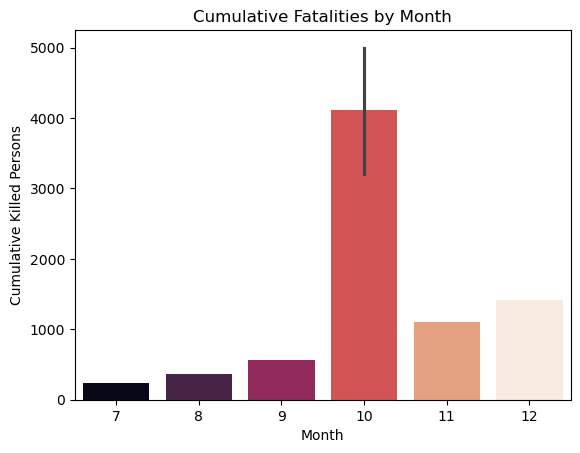

In [17]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='month', 
            y='Cumulative_Killed_Persons', 
            hue='month',  # Assigning x to hue
            data=df, 
            palette='rocket',  # Color palette
            legend=False)      # Removes the extra legend

plt.xlabel('Month')
plt.ylabel('Cumulative Killed Persons')
plt.title('Cumulative Fatalities by Month')
plt.show()




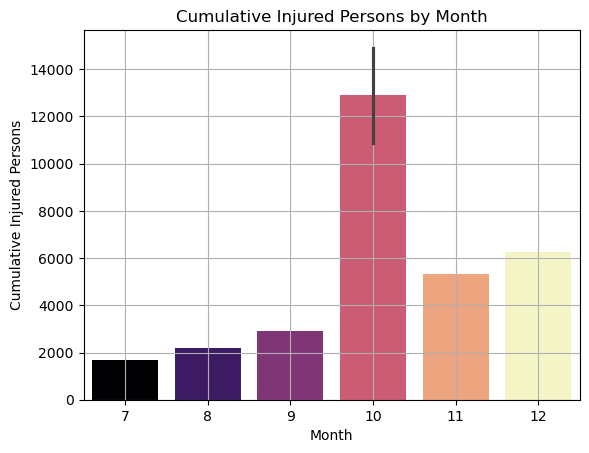

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved Bar Plot with Custom Colors and Future-Proofing
sns.barplot(x='month', 
            y='Cumulative_Injured_Persons', 
            hue='month',           # Future-proofing (avoids warning)
            data=df, 
            palette='magma',       # Custom color palette
            legend=False)          # Avoids redundant legend

# Adding meaningful labels and title
plt.xlabel('Month')
plt.ylabel('Cumulative Injured Persons')
plt.title('Cumulative Injured Persons by Month')
plt.grid(True)  # Optional: Adds grid lines for clarity
plt.show()


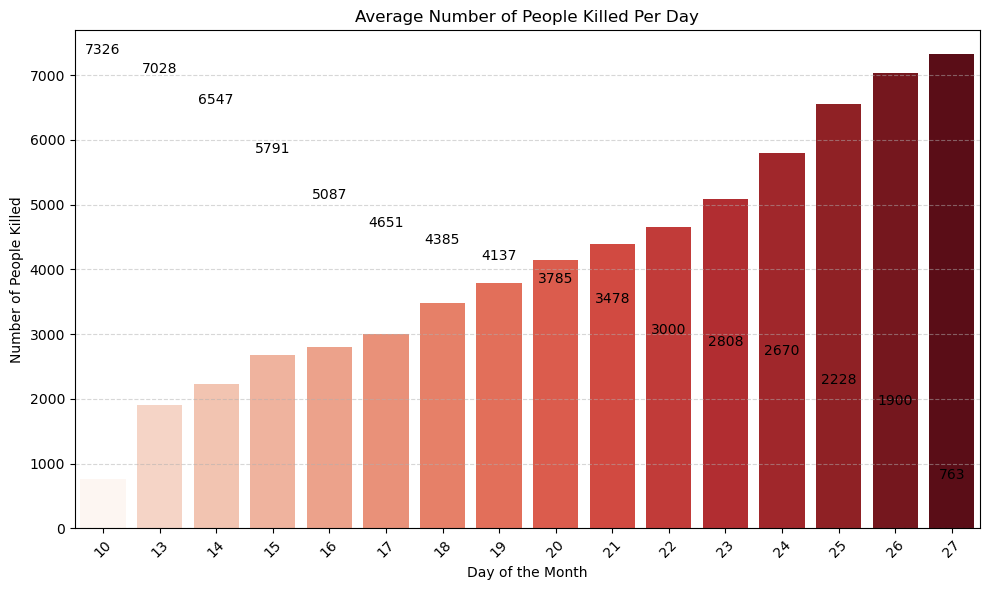

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns  # For improved styling

# Grouping, sorting, and calculating the mean
every_Day_killed = df.groupby('day_of_month')['Cumulative_Killed_Persons'].mean().sort_values(ascending=False)

# Plotting with enhancements and future-proofing
plt.figure(figsize=(10, 6))  # Custom figure size
sns.barplot(x=every_Day_killed.index, 
            y=every_Day_killed.values, 
            hue=every_Day_killed.index,   # FIX: Assign `x` to `hue`
            palette='Reds',               # Warm color scheme
            legend=False)                 # FIX: Removes redundant legend

# Adding value labels on bars
for i, value in enumerate(every_Day_killed.values):
    plt.text(i, value + 2, f"{int(value)}", ha='center')

# Adding titles and labels
plt.title('Average Number of People Killed Per Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of People Killed')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Grid for readability

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()       # Ensures everything fits well
plt.show()


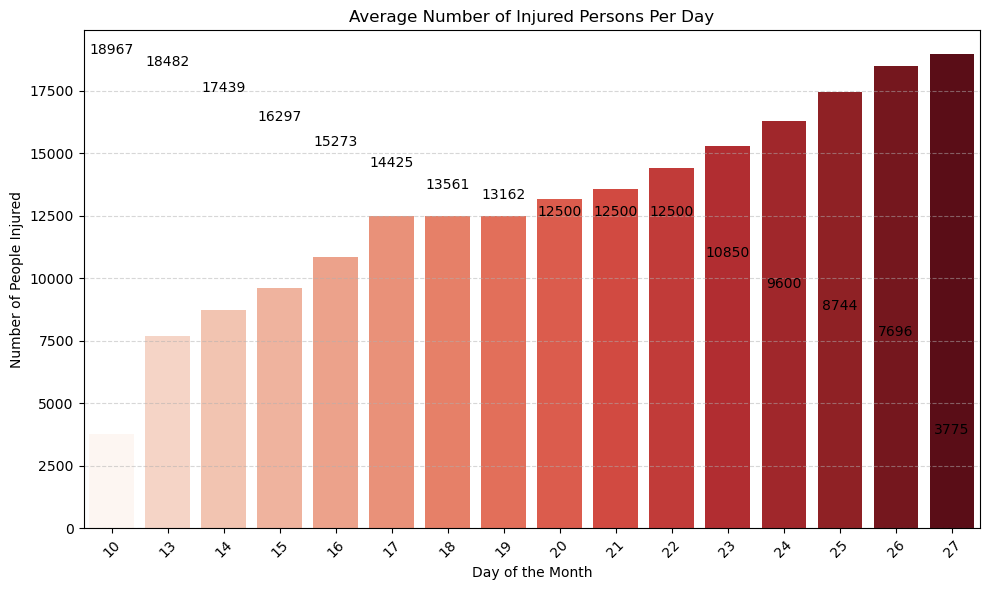

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping, sorting, and calculating the mean
every_Day_killed = df.groupby('day_of_month')['Cumulative_Injured_Persons'].mean().sort_values(ascending=False)

# Improved Bar Plot with Red Theme
plt.figure(figsize=(10, 6))
sns.barplot(x=every_Day_killed.index, 
            y=every_Day_killed.values, 
            hue=every_Day_killed.index,  # Future-proofing
            palette='Reds',              # 🔥 Red color theme
            legend=False)

# Adding value labels on top of bars
for i, value in enumerate(every_Day_killed.values):
    plt.text(i, value + 5, f"{int(value)}", ha='center')

# Adding titles and labels
plt.title('Average Number of Injured Persons Per Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of People Injured')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Grid for readability

plt.xticks(rotation=45)
plt.tight_layout()  # Ensures everything fits well
plt.show()


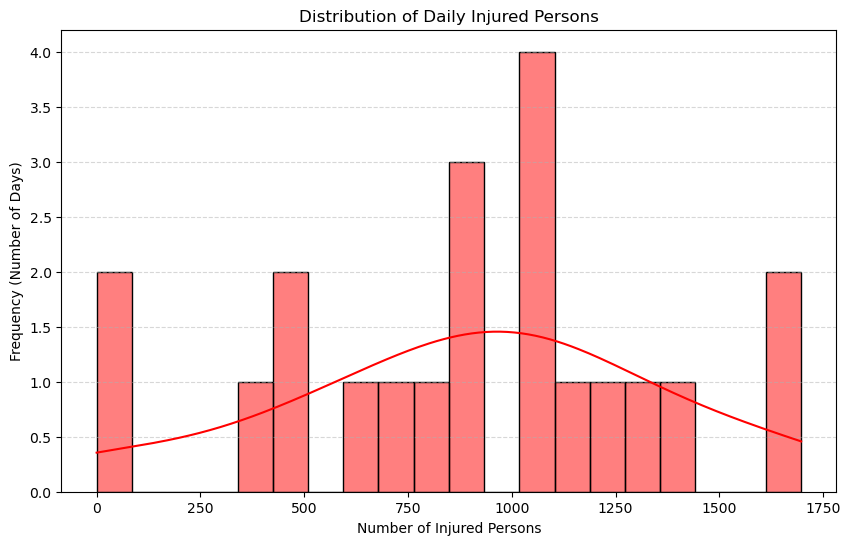

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df.Daily_Injured_Persons, 
             bins=20,             # Controls the number of bins (range groups)
             kde=True,            # Adds a smooth curve to visualize the distribution
             color='red')         # Red for impact

# Titles and Labels
plt.title('Distribution of Daily Injured Persons')
plt.xlabel('Number of Injured Persons')
plt.ylabel('Frequency (Number of Days)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


month
10    390.5625
12    317.0000
7     232.0000
11    200.0000
9     190.0000
8     138.0000
Name: Daily_Killed_Persons, dtype: float64


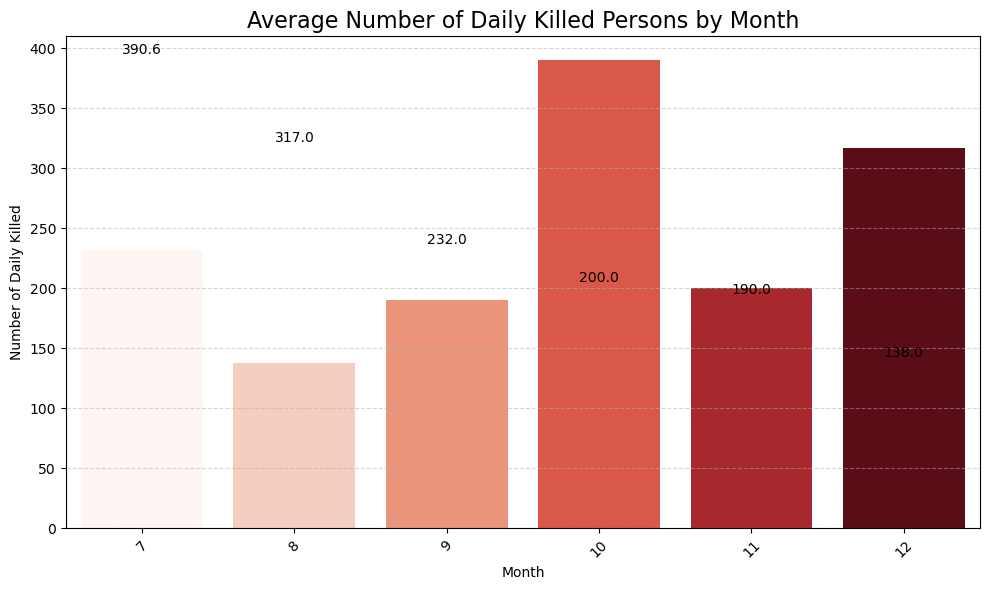

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and calculating the average daily killed persons
month_daily_killed = df.groupby('month')['Daily_Killed_Persons'].mean().sort_values(ascending=False)

# 🔢 Print the calculated values for reference
print(month_daily_killed)

# Bar plot with red shades
plt.figure(figsize=(10, 6))
sns.barplot(x=month_daily_killed.index, 
            y=month_daily_killed.values, 
            hue=month_daily_killed.index,  #  Fixed Warning
            palette='Reds',                #  Intense red shades for emphasis
            legend=False)                  #  Avoids unnecessary legend

# Add value labels on top of bars
for i, value in enumerate(month_daily_killed.values):
    plt.text(i, value + 5, f"{value:.1f}", ha='center')

# Enhancements
plt.title('Average Number of Daily Killed Persons by Month', fontsize=16)
plt.ylabel('Number of Daily Killed')
plt.xlabel('Month')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.xticks(rotation=45)  # Rotate month names for better readability
plt.tight_layout()       # Ensures everything fits nicely
plt.show()


month
7     1697.0000
11    1089.0000
12     929.0000
10     878.0625
9      700.0000
8      503.0000
Name: Daily_Injured_Persons, dtype: float64


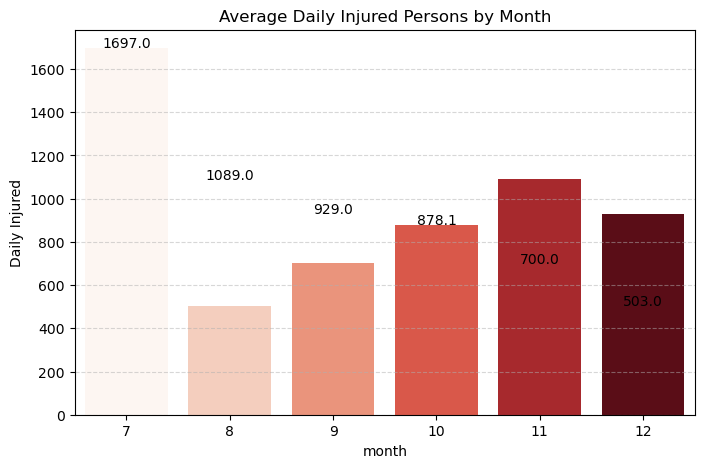

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group and calculate the average number of daily injured persons
month_daily_killed = df.groupby('month')['Daily_Injured_Persons'].mean().sort_values(ascending=False)

# Print the data for reference
print(month_daily_killed)

# Bar plot with red color (Fixed Warning)
plt.figure(figsize=(8, 5))
sns.barplot(x=month_daily_killed.index, 
            y=month_daily_killed.values, 
            hue=month_daily_killed.index,   #  Fixed Warning
            palette='Reds', 
            legend=False)                   #  Legend disabled since hue is just for color

# Add values on top of bars
for i, value in enumerate(month_daily_killed.values):
    plt.text(i, value + 2, f"{value:.1f}", ha='center')

# Basic labels
plt.ylabel('Daily Injured')
plt.title('Average Daily Injured Persons by Month')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


<Axes: xlabel='Date', ylabel='Cumulative_Killed_Persons'>

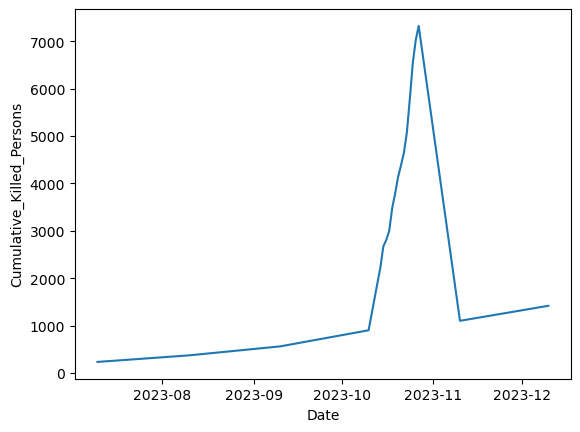

In [33]:
sns.lineplot(x=df.Date,y=df.Cumulative_Killed_Persons)


<Axes: xlabel='Date', ylabel='Cumulative_Injured_Persons'>

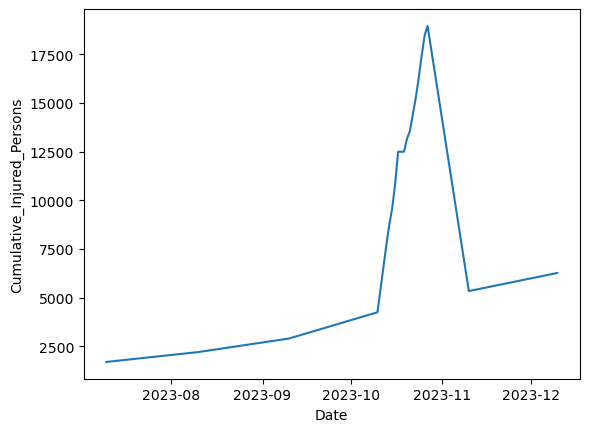

In [34]:
sns.lineplot(x=df.Date,y=df.Cumulative_Injured_Persons)


<Axes: xlabel='Cumulative_Killed_Persons', ylabel='Cumulative_Injured_Persons'>

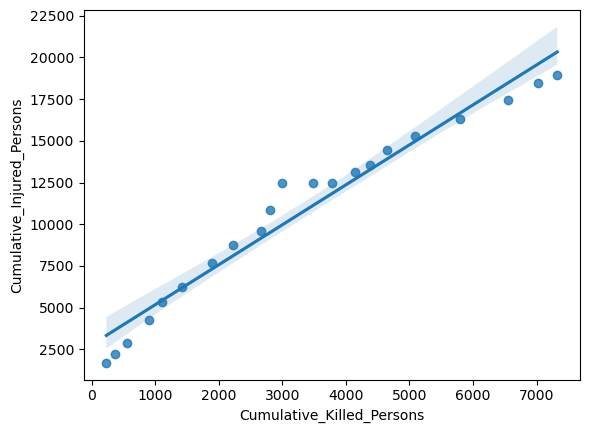

In [35]:
sns.regplot(x=df.Cumulative_Killed_Persons,y=df.Cumulative_Injured_Persons)


<Axes: xlabel='Cumulative_Killed_Persons', ylabel='Daily_Killed_Persons'>

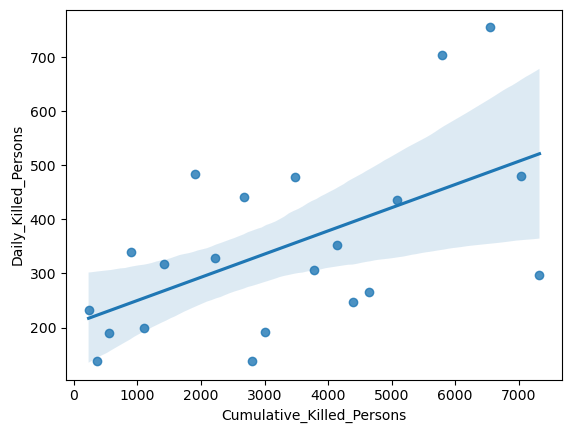

In [36]:
sns.regplot(x=df.Cumulative_Killed_Persons,y=df.Daily_Killed_Persons)


<Axes: xlabel='Daily_Injured_Persons', ylabel='Daily_Killed_Persons'>

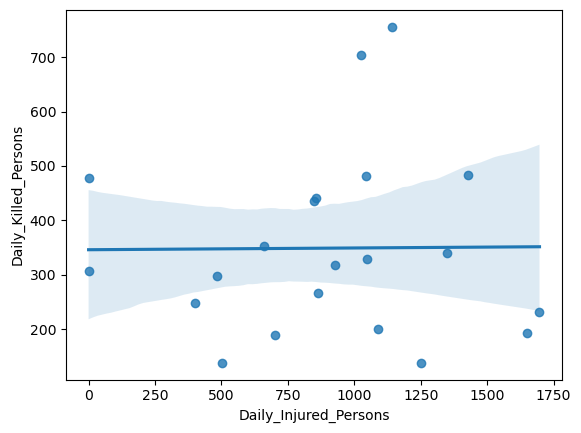

In [37]:
sns.regplot(x=df.Daily_Injured_Persons,y=df.Daily_Killed_Persons)


<Axes: >

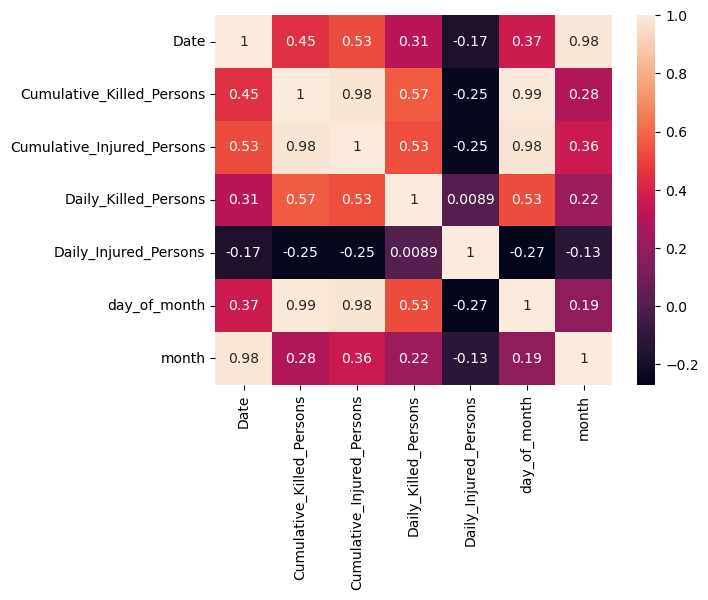

In [38]:
 corr_df=df.corr()
 sns.heatmap(corr_df,annot=True)
